In [13]:
# Python Libraries Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.utils import resample

#### Jelly beans experiment. In this simple simulation we will demonstrate an example of data snooping.

### Part 1: does eating jelly beans cause acne?

##### participant's acne condition measured as a value between  0 and 1

In [11]:
# Set seed for reproducibility
np.random.seed(1)

# Parameters
people = 500 
p_eat_jelly_bean = 0.9

# Draw a sample for acne condition
acne_condition = np.random.uniform(0, 1, people)

# Draw a sample for eating status
eating = resample(pd.Series(['eating', 'not eating']), n_samples=people)

# Create DataFrame
data = pd.DataFrame({'acne_condition': acne_condition, 'eating': eating})

# Display first few rows of the DataFrame
print(data.head())

   acne_condition      eating
0        0.417022      eating
0        0.720324      eating
0        0.000114      eating
1        0.302333  not eating
0        0.146756      eating


###### Visualize Data using Boxplot

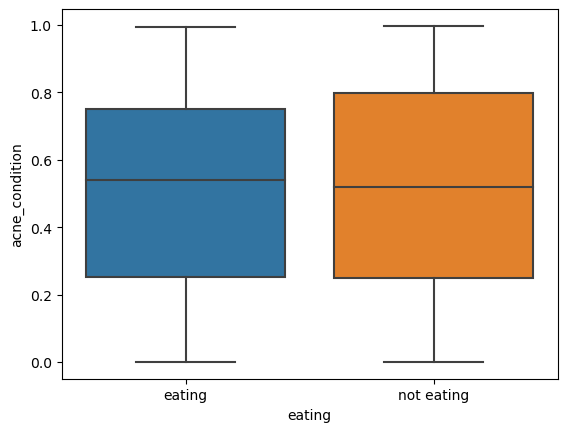

In [12]:
sns.boxplot(x='eating',y='acne_condition',data=data)
plt.show()

#### According to the boxplot, there is no significant difference in eating_condition between two eating categories.

### There is no effect of eating jelly beans on acne condition." To check this hypothesis we run t-test.

In [14]:
# Extract acne condition for those who eat jelly beans and those who don't
acne_condition_eating = data[data['eating'] == 'eating']['acne_condition']
acne_condition_not_eating = data[data['eating'] == 'not eating']['acne_condition']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(acne_condition_eating, acne_condition_not_eating)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in acne condition between those who eat jelly beans and those who don't.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in acne condition between those who eat jelly beans and those who don't.")

T-Statistic: -0.11856031173993901
P-Value: 0.905671516932588
Fail to reject the null hypothesis. There is no statistically significant difference in acne condition between those who eat jelly beans and those who don't.


#### Part 2: which jelly bean color causes acne?

In [17]:
# Set seed for reproducibility
np.random.seed(1)

# Parameters
people = 500

# Create a list of colors
colors = ['red', 'grey', 'blue', 'yellow', 'orange', 'purple', 'limegreen', 
          'cyan', 'brown', 'pink', 'gold', 'salmon', 'magenta', 
          'peachpuff', 'tan', 'aquamarine', 'green', 'coral', 'steelblue', 'beige']

# Add color column to the data
data = pd.DataFrame({'jelly_bean_color': np.random.choice(colors, size=people, replace=True)})
data['eating'] = np.random.choice(['eating', 'not eating'], size=people)
data['acne_condition'] = np.random.uniform(0, 1, people)
# Set color to NA for those who are not eating jelly beans
data.loc[data['eating'] == 'not eating', 'jelly_bean_color'] = np.nan

# Display first few rows of the data
print(data.head())

  jelly_bean_color      eating  acne_condition
0           purple      eating        0.447687
1           salmon      eating        0.576449
2              NaN  not eating        0.201467
3              NaN  not eating        0.720518
4             pink      eating        0.847344


###### Visualize Data using Boxplot

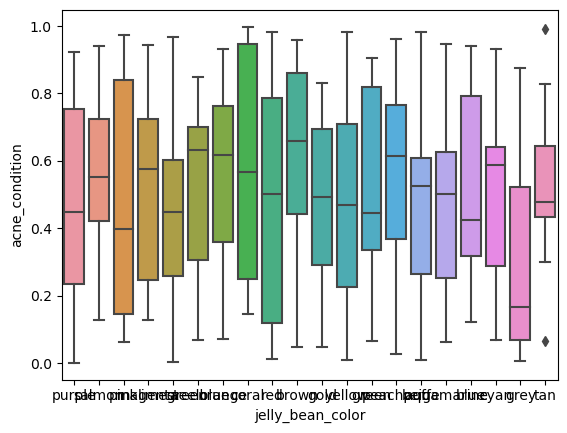

In [19]:
sns.boxplot(x='jelly_bean_color',y='acne_condition',data=data)
plt.show()

#### To check the influence of a specific jelly bean color on acne condition you again run t-test.

In [50]:
def test_color(data, color):
    # Filter data based on the specified color
    data_filtered = data[data['jelly_bean_color'] == color]
    
    # Create a new column indicating whether each person is eating jelly beans of that color
    data_filtered['eating_color'] = np.where(data_filtered['jelly_bean_color'].isna(), 'no', 'yes')
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(data_filtered[data_filtered['eating_color'] == 'yes']['acne_condition'],
                                           data[(data['jelly_bean_color'] != color) & (data['eating'] == 'not eating')]['acne_condition'])
    
    return p_value

In [51]:
alpha = 0.05
colors = data['jelly_bean_color'].dropna().unique()

for color in colors:
    p_value = test_color(data=data.copy(), color=color)  # Make a copy of the DataFrame
    if p_value < alpha:
        print(color)
        print("Reject the null hypothesis. There is a statistically significant difference in acne condition for color", color,p_value)
    else:
        print(color)
        print("Fail to reject the null hypothesis. There is no statistically significant difference in acne condition for", color)


purple
Fail to reject the null hypothesis. There is no statistically significant difference in acne condition for purple
salmon
Fail to reject the null hypothesis. There is no statistically significant difference in acne condition for salmon
pink
Fail to reject the null hypothesis. There is no statistically significant difference in acne condition for pink
magenta
Fail to reject the null hypothesis. There is no statistically significant difference in acne condition for magenta
limegreen
Fail to reject the null hypothesis. There is no statistically significant difference in acne condition for limegreen
steelblue
Fail to reject the null hypothesis. There is no statistically significant difference in acne condition for steelblue
orange
Fail to reject the null hypothesis. There is no statistically significant difference in acne condition for orange
coral
Fail to reject the null hypothesis. There is no statistically significant difference in acne condition for coral
red
Fail to reject the n

C:\Users\benmh\AppData\Local\Temp\ipykernel_9836\2434842834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['eating_color'] = np.where(data_filtered['jelly_bean_color'].isna(), 'no', 'yes')
C:\Users\benmh\AppData\Local\Temp\ipykernel_9836\2434842834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['eating_color'] = np.where(data_filtered['jelly_bean_color'].isna(), 'no', 'yes')
C:\Users\benmh\AppData\Local\Temp\ipykernel_9836\2434842834.py:6: SettingWithCopyWarning: 
A val

We found: Reject the null hypothesis. There is a statistically significant difference in acne condition for color grey 0.04625222250755861

# Interpretation

Next, if there is  5%
  to observe a significant result under the null, then testing  20
  hypotheses will result in
1−0.9520≈64%.
 In other words, running many tests on the same data increased the probability to observe some significant result form  5%
  to  64%
 ! This explaines why checking 20 different jelly bean colors revealed one color that is "associated" with acne.

### Conclusion
Looking for patterns in data is legitimate. However, you should be very careful when interpreting the results. As we showed above, running multiple tests and presenting only the significant ones without the appropriate context can be very misleading

#### Now, let's use cross-validation to validate your hypothesis

In [54]:
from sklearn.model_selection import train_test_split, KFold
from scipy import stats
import numpy as np

# Define function for hypothesis testing
def test_hypothesis(data):
    colors = data['jelly_bean_color'].dropna().unique()
    results = []

    for color in colors:
        # Filter data based on the specified color
        data_filtered = data[data['jelly_bean_color'] == color]

        # Perform t-test
        t_statistic, p_value = stats.ttest_ind(data_filtered[data_filtered['eating'] == 'eating']['acne_condition'],
                                               data_filtered[data_filtered['eating'] == 'not eating']['acne_condition'])
        results.append(p_value)

    return results

# Define parameters
alpha = 0.05
num_iterations = 100
significant_counts = []

# Repeat the process multiple times
for _ in range(num_iterations):
    # Split data into training and testing sets
    train_data, test_data = train_test_split(data, test_size=0.5, random_state=None)  # Adjust test_size as needed

    # Perform hypothesis testing on the testing set
    p_values = test_hypothesis(test_data)

    # Count significant results
    significant_count = sum(p_value < alpha for p_value in p_values)
    significant_counts.append(significant_count)

# Evaluate the results
avg_significant_count = np.mean(significant_counts)
print("Average number of significant results:", avg_significant_count)

Average number of significant results: 0.0


#### So. as you can seee we can;t be fooled by the reuslts of the extensive hunting through data or Data Snooping.